In [1]:
import synthx as sx

### with intervention effect

In [2]:
df = sx.sample(
    n_units=200,
    n_time=50,
    n_observed_covariates=3,
    n_unobserved_covariates=2,
    intervention_units=[1, 2],
    intervention_time=40,
    intervention_effect=1.03,
    noise_effect=0.1,
    scale=2000,
    seed=42,
)

In [3]:
dataset = sx.Dataset(
    df,
    unit_column='unit',
    time_column='time',
    y_column='y',
    covariate_columns=['covariate_1', 'covariate_2', 'covariate_3'],
    intervention_units=[1, 2],
    intervention_time=40,
    validation_time=35,
)

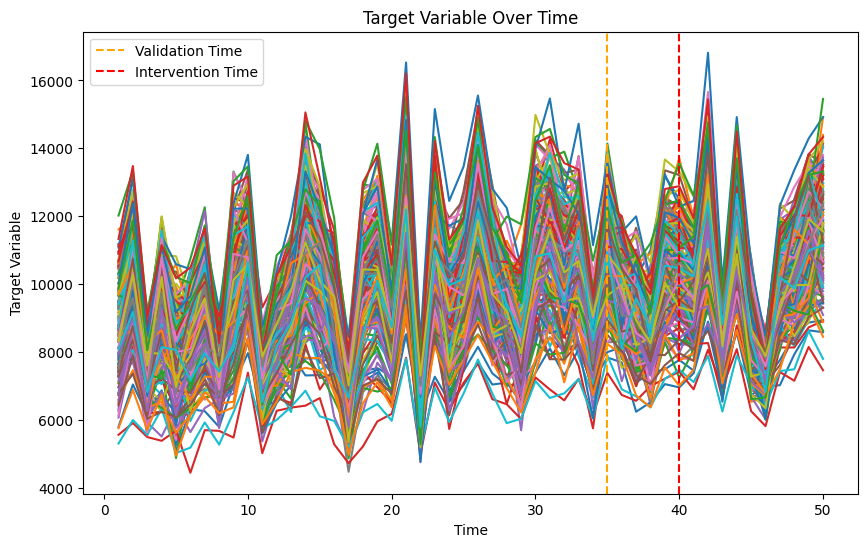

In [4]:
dataset.plot()

In [5]:
sc = sx.synthetic_control(dataset, sparsity_lambda=0.01)

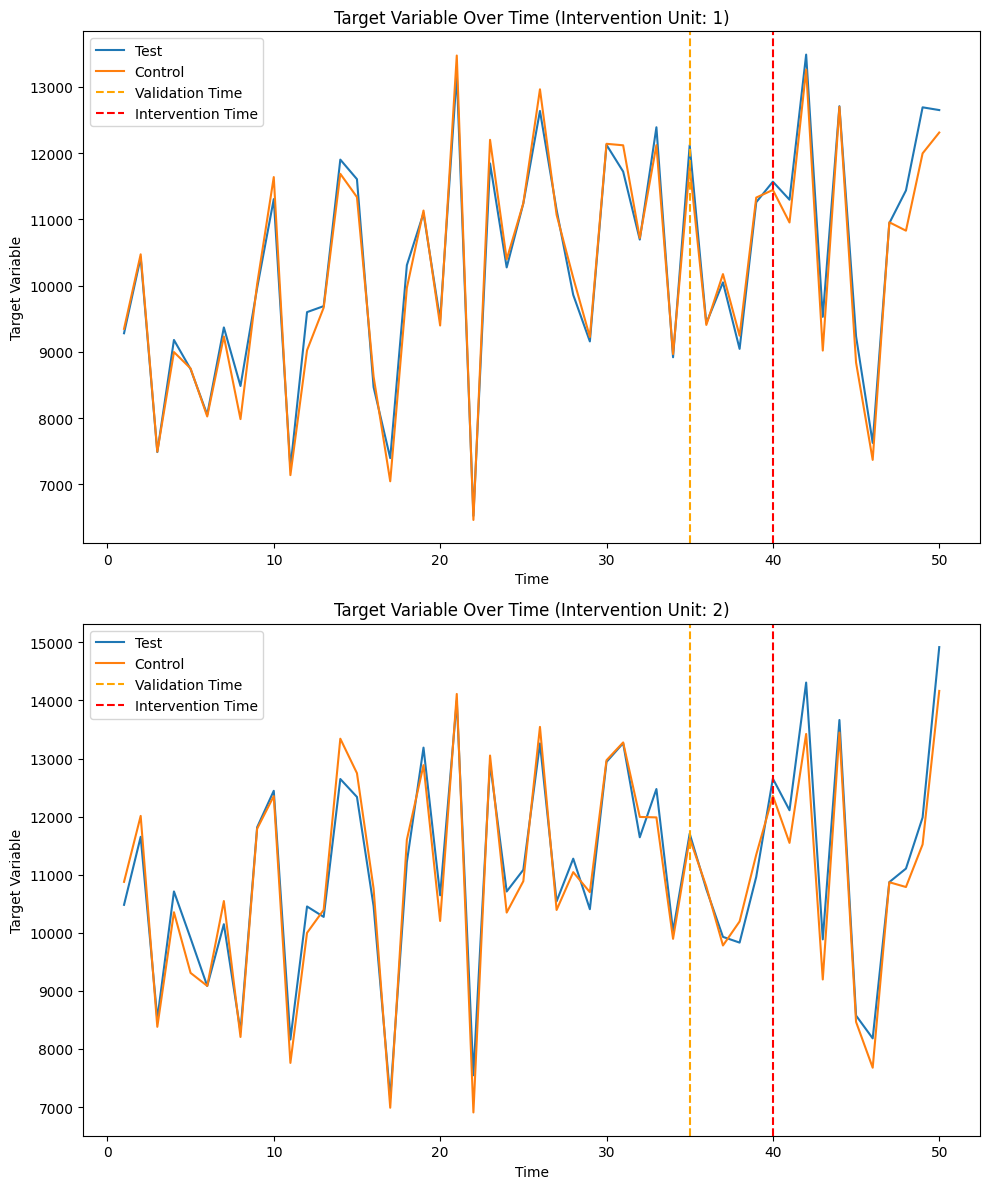

In [6]:
sc.plot()

In [7]:
sc.estimate_effects()

[0.029875516156992916, 0.03728832117040859]

In [8]:
sc.validation_differences()

[-0.002729302285761154, -0.012936435880041099]

In [9]:
sc.paired_ttest()

[{'intervention_unit': 1,
  'p_value_in_training': 0.6566283115247282,
  'p_value_in_intervention': 0.0009824931411428395,
  'p_value': 0.03103436198153972},
 {'intervention_unit': 2,
  'p_value_in_training': 0.6209214298245593,
  'p_value_in_intervention': 0.0003831439777666371,
  'p_value': 0.04657210676577925}]

### without intervention effect

In [10]:
df = sx.sample(
    n_units=200,
    n_time=50,
    n_observed_covariates=3,
    n_unobserved_covariates=2,
    intervention_units=[1, 2],
    intervention_time=40,
    intervention_effect=1,
    noise_effect=0.1,
    scale=2000,
    seed=42,
)

In [11]:
dataset = sx.Dataset(
    df,
    unit_column='unit',
    time_column='time',
    y_column='y',
    covariate_columns=['covariate_1', 'covariate_2', 'covariate_3'],
    intervention_units=[1, 2],
    intervention_time=40,
    validation_time=35,
)

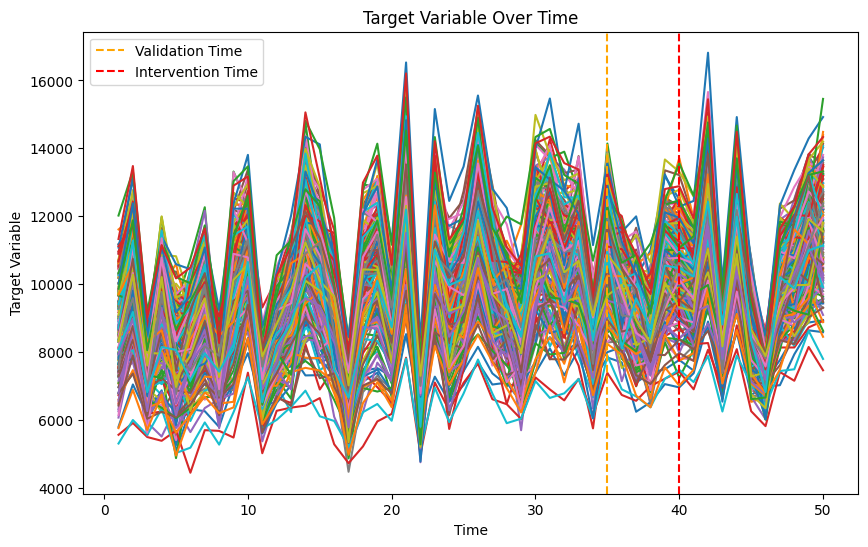

In [12]:
dataset.plot()

In [13]:
sc = sx.synthetic_control(dataset, sparsity_lambda=0.01)

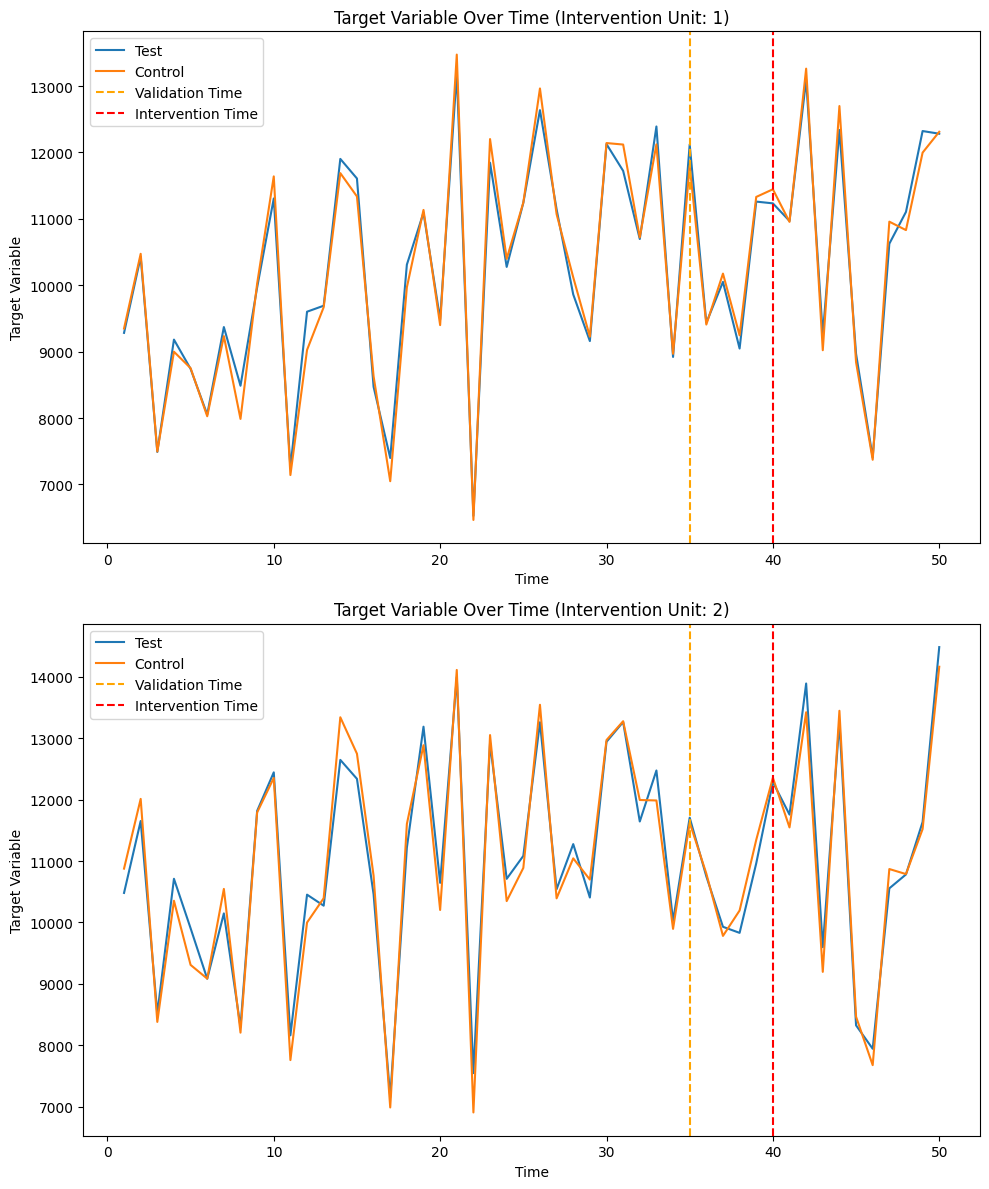

In [14]:
sc.plot()

In [15]:
sc.estimate_effects()

[-0.0026593802157032927, 0.006223367087046134]

In [16]:
sc.validation_differences()

[-0.002729302285761154, -0.012936435880041099]

In [17]:
sc.paired_ttest()

[{'intervention_unit': 1,
  'p_value_in_training': 0.6566283115247282,
  'p_value_in_intervention': 0.9051515100611699,
  'p_value': 0.7731927583479418},
 {'intervention_unit': 2,
  'p_value_in_training': 0.6209214298245593,
  'p_value_in_intervention': 0.24101044452750625,
  'p_value': 0.5060273426849368}]